In [1]:
# import sys
import os
import glob

In [2]:
import numpy as np
import matplotlib.pyplot as plt
import audacity
import TransferFunctions as tf
import scipy.signal as sig

%matplotlib notebook

List of audacity files

In [3]:
datadir = os.path.join('C:\\Users\\acoustics','My Documents\\GitHub\\legato-transients\\transfer\\b-foot')

glob.glob(os.path.join(datadir,'*.aup'))
#os.listdir(os.path.join(datadir))

['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_1.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_2.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_3.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_4.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_1.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_10.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_11.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_12.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_2.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transien

In [4]:
dfiles = ['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_reference.aup']

dfiles.extend(('C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\closed_start_1.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_2.aup',
#                'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_3.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_4.aup',
#                'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_5.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_6.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_8.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_10.aup',
               'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_opening_12.aup'))

Load File, read data, and pad to have same length on all channels

In [14]:
nfft=1024*4

tfdata = []

for file in dfiles:
    print(file)
    au = audacity.Aup(file)
    rdata = []
    maxl = 0
    for ii in range(au.nchannels):
        rdata.append(au.get_channel_data(ii))
        maxl = max(maxl,len(rdata[-1]))

    data = np.zeros((maxl,len(rdata)))
    for ii,rd in enumerate(rdata):
        data[:len(rd),ii]=rd
        
    delay=tf.determineDelay(data[:,0]/np.mean(data[:,0]),data[:,2]/np.mean(data[:,2]),maxdel=2**15)
    print("Delay: %d samples"%delay)
    data[:,0]=np.roll(data[:,0],delay)
    
    sr=au.rate
   
    tfxy,ff=tf.tfe(data[:,3],data[:,2],Fs=sr,NFFT=nfft)
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ff,coh=sig.coherence(data[:,2],data[:,3],fs=sr,nperseg=nfft)

    datadict={'tf':tfxy,'coh':coh}
    
    for chno in [au.nchannels-2,au.nchannels-1]:
        tfxy,ff=tf.tfe(data[:,chno],data[:,0],Fs=sr,NFFT=nfft)
        #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
        # ff,coh=sig.coherence(data[:,0],data[:,chno],fs=sr,nperseg=nfft)
        datadict['mic%d'%(chno-1)]=tfxy

    tfdata.append(datadict)


C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\2tieclip_reference.aup
Delay: 1704 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\closed_start_1.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_2.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_4.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_6.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_8.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_10.aup
Delay: 1770 samples
C:\Users\acoustics\My Documents\GitHub\legato-transients\transfer\b-foot\1701_opening_12.aup
Delay: 1770 samples


<IPython.core.display.Javascript object>


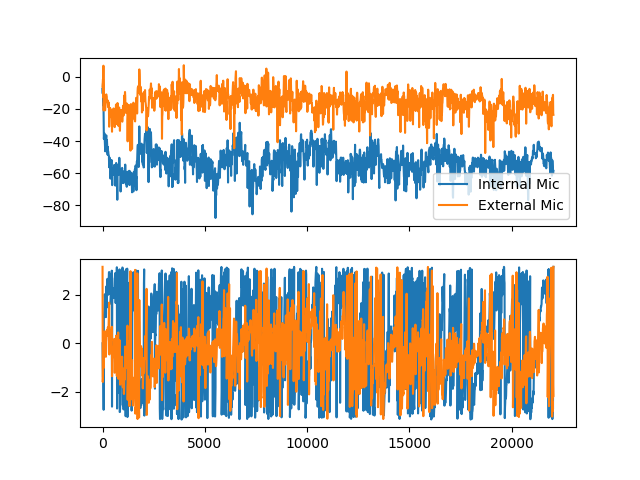

In [16]:
fig,ax = plt.subplots(2,sharex=True)

recno = 1
refno = 0
fig.set_label('Recording %d, internal vs external spectra' % recno)
ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic2']/tfdata[refno]['mic2'])), label='Internal Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic2']/tfdata[refno]['mic2'])))

ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['mic1']/tfdata[refno]['mic1'])), label='External Mic')
ax[1].plot(ff,(np.angle(tfdata[recno]['mic1']/tfdata[refno]['mic1'])))

ax[0].legend(loc='lower right')


<IPython.core.display.Javascript object>


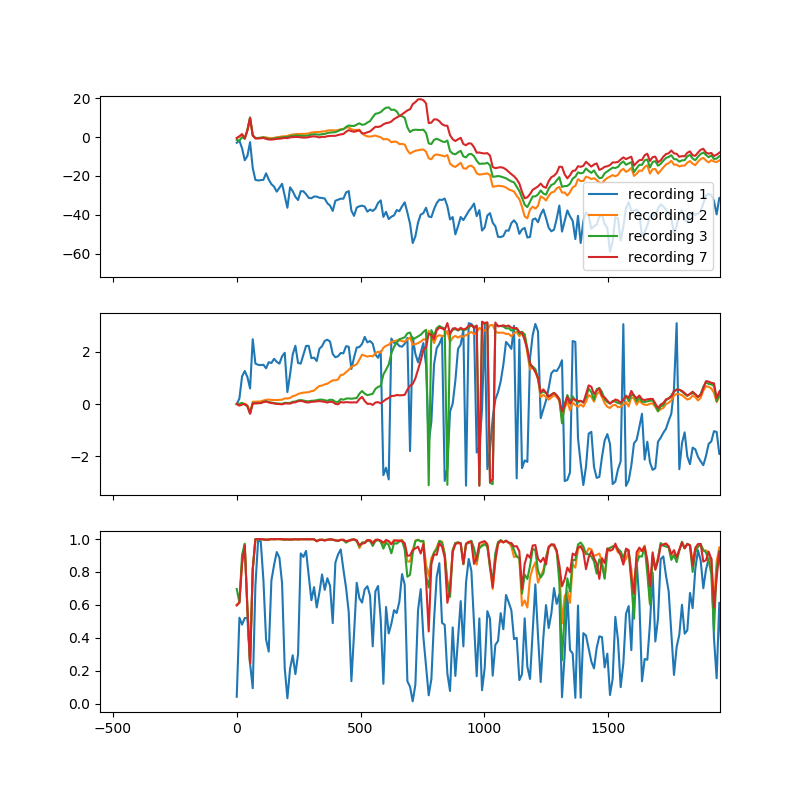

In [17]:
fig,ax = plt.subplots(3,sharex=True, figsize=((8, 8)))
fig.set_label('Transfer functions')

# chno = 1
refno = 0
for recno in [1,2,3,7]:

    ax[0].plot(ff,20*np.log10(np.abs(tfdata[recno]['tf']/tfdata[refno]['tf'])), label='recording %d' % recno)
    ax[0].legend(loc='lower right')
    ax[1].plot(ff,(np.angle(tfdata[recno]['tf']/tfdata[refno]['tf'])))
    #coh,ff=tf.cohere(data[:,1],data[:,2],Fs=sr,NFFT=nfft)
    ax[2].plot(ff,np.min([tfdata[recno]['coh'],tfdata[refno]['coh']],axis=0))


In [18]:
sig.coherence?

In [40]:
dfiles

['C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\2tieclip_reference.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\closed_start_1.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_1.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_2.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_3.aup',
 'C:\\Users\\acoustics\\My Documents\\GitHub\\legato-transients\\transfer\\b-foot\\1701_closing_4.aup']